<a href="https://colab.research.google.com/github/Rifsch/userworld43.github.io/blob/main/RVC_Genshin_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

# RVC Genshin Impact
</div>

----
Google has recently taken actions to restrict the usage of the RVC code, I'm not sure how long this RVC will last.<br/>It appears that instead of directly blocking the code, they are limiting access to various resources.

----
##### Changelog 2022.10.07
- Added how to use.

# New Infer (Recommended)

### How to Use?

1. Click the cell number 1 & 2.
2. Use youtube link as audio input or Upload song on AICoverGen\song_output using Google Colab Files Explorer then input name file of the file that you've uploaded to that folder.
3. Click the cell number 3.
4. Wait until its done,
5. Done.

In [2]:
#@title 1. Clone Repository & Install Requirement

!git clone https://github.com/SociallyIneptWeeb/AICoverGen.git
!git clone https://github.com/ArkanDash/rvc-genshin-model.git
%cd AICoverGen
!pip install -q -r requirements.txt
!sudo apt update
!sudo apt install sox

Cloning into 'AICoverGen'...
remote: Enumerating objects: 339, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 339 (delta 170), reused 152 (delta 152), pack-reused 151
Receiving objects: 100% (339/339), 1.79 MiB | 24.11 MiB/s, done.
Resolving deltas: 100% (214/214), done.
Cloning into 'rvc-genshin-model'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 9 (delta 2), reused 9 (delta 2), pack-reused 0
Receiving objects: 100% (9/9), done.
Resolving deltas: 100% (2/2), done.
/content/AICoverGen
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 75.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  

In [3]:
#@title 2. Download MDXNet Vocal Separation and Hubert Base Models
!python src/download_models.py

All models downloaded!


In [4]:
# @title 3. Generate | Output generated inside "AICoverGen\song_output\random_number"
# @markdown Main Option | You also can input audio path inside "SONG_INPUT"

# @markdown Example: audio.wav, https://www.youtube.com/watch?v=4wwi-wdpeck
SONG_INPUT = "https://youtu.be/pYBoAbYJRV4?si=e_fuOwfzD4b8D1tE" # @param {type:"string"}
CHARACTER = "nahida-jp-v2" # @param ["ayaka-jp","ayato-jp","diluc-jp","eula-jp","fischl-jp","ganyu-jp","hutao-jp","kaeya-jp","keqing-jp","klee-jp","kokomi-jp","mona-jp","nahida-jp","nilou-jp","wanderer-jp","yaemiko-jp","yelan-jp","yoimiya-jp","zhongli-jp","aether-jp-v2","albedo-jp-v2","alhaitam-jp-v2","amber-jp-v2","ayaka-jp-v2","bennett-jp-v2","charlotte-jp-v2","chongyun-jp-v2","cyno-jp-v2","dehya-jp-v2","diona-jp-v2","faruzan-jp-v2","furina-jp-v2","greaterLordRukkhadevata-jp-v2","itto-jp-v2","kaveh-jp-v2","kazuha-jp-v2","kuki-jp-v2","lisa-jp-v2","lumine-jp-v2","lyney-jp-v2","nahida-jp-v2","navia-jp-v2","nilou-jp-v2","ningguang-jp-v2","noelle-jp-v2","paimon-jp-v2","qiqi-jp-v2","raiden-jp-v2","razor-jp-v2","sara-jp-v2","shenhe-jp-v2","signora-jp-v2","venti-jp-v2","xiao-jp-v2","yanfei-jp-v2","zhongli-jp-v2"]

# @markdown Audio Editor Options
PITCH_CHANGE = 0 # @param {type:"integer"}
PITCH_CHANGE_ALL = 0 # @param {type:"integer"}
# @markdown Voice Conversion Options
INDEX_RATE = 0.6 # @param {type:"number"}
FILTER_RADIUS = 3 # @param {type:"integer"}
PITCH_DETECTION_ALGO = "crepe" # @param ["pm", "harvest", "rmvpe", "crepe", "mangio-crepe"]
CREPE_HOP_LENGTH = 128 # @param {type:"integer"}
PROTECT = 0.5 # @param {type:"number"}
REMIX_MIX_RATE = 0.25  # @param {type:"number"}
# @markdown Audio Mixing Options
MAIN_VOL = 0 # @param {type:"integer"}
BACKUP_VOL = 0 # @param {type:"integer"}
INST_VOL = 0 # @param {type:"integer"}
# @markdown Reverb Control
REVERB_SIZE = 0.15 # @param {type:"number"}
REVERB_WETNESS = 0.2 # @param {type:"number"}
REVERB_DRYNESS = 0.8 # @param {type:"number"}
REVERB_DAMPING = 0.7 # @param {type:"number"}
# @markdown Output Format
OUTPUT_FORMAT = "mp3" # @param ["mp3", "wav"]

import subprocess
import json
import os
import zipfile
import glob

def extract_zip(zip_file, target_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(target_folder)

with open('/content/rvc-genshin-model/genshin_model.json', 'r') as file:
    data = json.load(file)

if not os.path.exists(f"rvc_models/{CHARACTER}"):
  if "v2" in CHARACTER:
    ver_2 = data["version_2"]
    for item in ver_2:
      if CHARACTER in item[0]:
        subprocess.run(['mkdir', f'rvc_models/{item[0]}'])
        folder_path = f'rvc_models/{item[0]}'
        subprocess.run(['wget', '-P', folder_path, item[1]])
        zip_files = glob.glob(os.path.join(folder_path, "*.zip"))
        if len(zip_files) == 1:
          zip_file = zip_files[0]
          extract_zip(zip_file, folder_path)
          os.remove(zip_file)
        else:
          print("Error: Multiple zip files found.")
  else:
    ver_1 = data["version_1"]
    for item in ver_1:
      if CHARACTER in item[0]:
        subprocess.run(['mkdir', f'rvc_models/{item[0]}'])
        folder_path = f'rvc_models/{item[0]}'
        subprocess.run(['wget', '-P', folder_path, item[1]])
        zip_files = glob.glob(os.path.join(folder_path, "*.zip"))
        if len(zip_files) == 1:
          zip_file = zip_files[0]
          extract_zip(zip_file, folder_path)
          os.remove(zip_file)
        else:
          print("Error: Multiple zip files found.")
else:
  print(f"The model for {CHARACTER} already exists in rvc_models.")

command = [
    "python",
    "src/main.py",
    "-i", SONG_INPUT,
    "-dir", CHARACTER,
    "-p", str(PITCH_CHANGE),
    "-k",
    "-ir", str(INDEX_RATE),
    "-fr", str(FILTER_RADIUS),
    "-rms", str(REMIX_MIX_RATE),
    "-palgo", PITCH_DETECTION_ALGO,
    "-hop", str(CREPE_HOP_LENGTH),
    "-pro", str(PROTECT),
    "-mv", str(MAIN_VOL),
    "-bv", str(BACKUP_VOL),
    "-iv", str(INST_VOL),
    "-pall", str(PITCH_CHANGE_ALL),
    "-rsize", str(REVERB_SIZE),
    "-rwet", str(REVERB_WETNESS),
    "-rdry", str(REVERB_DRYNESS),
    "-rdamp", str(REVERB_DAMPING),
    "-oformat", OUTPUT_FORMAT
]

# Open a subprocess and capture its output
process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, universal_newlines=True)

# Print the output in real-time
for line in process.stdout:
    print(line, end='')

# Wait for the process to finish
process.wait()

2023-10-10 11:53:41.549670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 11:53:42.742027: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-10 11:53:44 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2023-10-10 11:53:45 | INFO | faiss.loader | Loading faiss with AVX2 support.
2023-10-10 11:53:45 | INFO | faiss.loader | Successfully loaded faiss with AVX2 support.

[download]   0.0% of    4.88MiB at  167.32KiB/s ETA 00:29[~] Starting AI Cover Generation Pipeline...
[~] Downloading song...

[download]   0.1% of    4.88MiB at  393.46KiB/s ETA 00:12
[download]   0.1% of    4.88MiB at  830.18KiB/s ETA 00:06
[download]   0.3% of    4.88MiB at    1.

0

Example of generated audio path

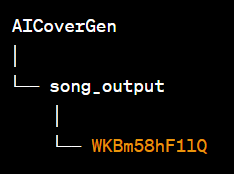

### Repository by [SociallyIneptWeeb](https://github.com/SociallyIneptWeeb/AICoverGen), Colab code by [ardha27](https://github.com/ardha27/AICoverGen-NoUI-Colab), Edited by ArkanDash